[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\AidaBah\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AidaBah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


paradise


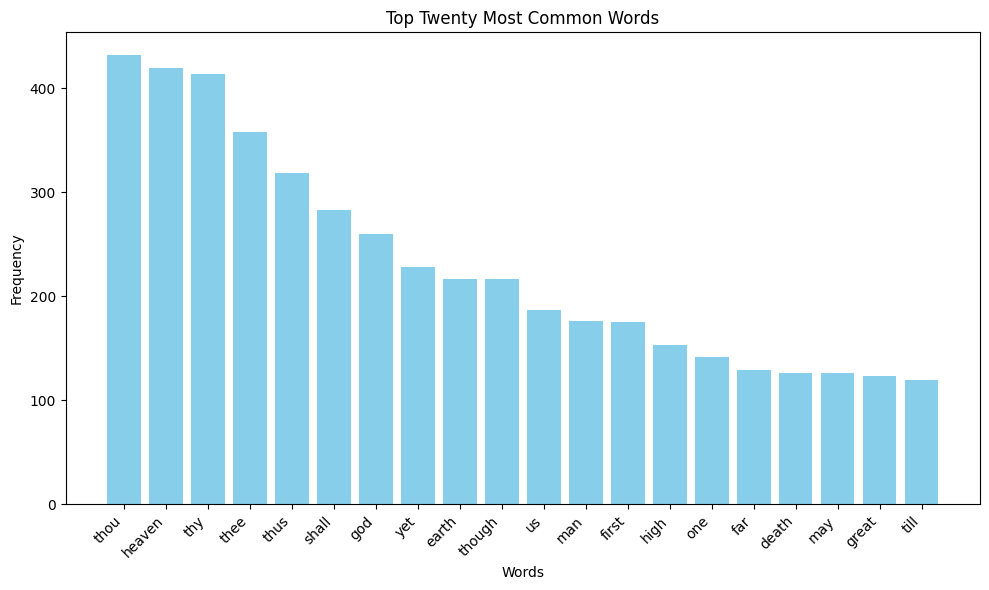

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AidaBah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Five Most Negative Sentences:
that now , while time was , our first parents had been warned the coming of their secret foe , and ' scaped , haply so ' scaped his mortal snare : for now satan , now first inflamed with rage , came down , the tempter ere the accuser of mankind , to wreak on innocent frail man his loss of that first battle , and his flight to hell : yet , not rejoicing in his speed , though bold far off and fearless , nor with cause to boast , begins his dire attempt ; which nigh the birth now rolling boils in his tumultuous breast , and like a devilish engine back recoils upon himself ; horrour and doubt distract his troubled thoughts , and from the bottom stir the hell within him ; for within him hell he brings , and round about him , nor from hell one step , no more than from himself , can fly by change of place : now conscience wakes despair , that slumbered ; wakes the bitter memory of what he was , what is , and what must be worse ; of worse deeds worse sufferings mu

In [13]:
import nltk 
from nltk.tokenize import word_tokenize  
nltk.download('gutenberg')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize 
from nltk.probability import FreqDist 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.corpus import names 
import string 
import matplotlib.pyplot as plt

paradise = nltk.corpus.gutenberg.words('milton-paradise.txt')
paradise_lower = [word.lower() for word in paradise]
len(paradise_lower)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
word = 'paradise'
print(lemmatizer.lemmatize(word))

sw = set(nltk.corpus.stopwords.words('english'))
sw

punctuation = set(string.punctuation)
paradise_one = [word for word in paradise_lower if word not in sw and word not in punctuation]
fdist = FreqDist(paradise_one) 
top_twenty = fdist.most_common(20)
top_twenty

words = [pair[0] for pair in top_twenty]
frequencies = [pair[1] for pair in top_twenty]

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Twenty Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

paradise_text = ' '.join(paradise_lower)
sentiment = analyzer.polarity_scores(paradise_text)
sentiment

sentences = nltk.sent_tokenize(paradise_text)
sentiment_scores = []
for sentence in sentences:
    sentiment_score = analyzer.polarity_scores(sentence)
    sentiment_scores.append((sentence, sentiment_score['compound']))
sentiment_scores.sort(key = lambda x: x[1])
most_negative = sentiment_scores[:5]
most_neutral = sentiment_scores[len(sentiment_scores)//2-2:len(sentiment_scores)//2+3]
most_positive = sentiment_scores[-5:]

print("Five Most Negative Sentences:")
for sentence, score in most_negative:
    print(sentence)
print("\nFive Most Neutral Sentences:")
for sentence, score in most_neutral:
    print(sentence) 
print("\nFive Most Positive Sentences:")
for sentence, score in most_positive:
    print(sentence)

#### Stemming vs Lemanization
In my code, since I'm analyzing a literary masterpiece like "Paradise Lost," where the language is likely more formal and archaic, lemmatization feels more appropriate. It ensures that I'm dealing with actual words and can capture the intended meanings more accurately.

#### Sentiment Analysis
Regarding sentiment analysis, I understand that while it can offer a general sense of the sentiment expressed in the text, it may not always accurately capture the nuances, especially in literary texts where context and interpretation are crucial. Therefore, I'll interpret the sentiment analysis scores with caution, particularly in complex texts like "Paradise Lost."

#### Extra Credit

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   --------- ------------------------------ 71.7/300.0 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


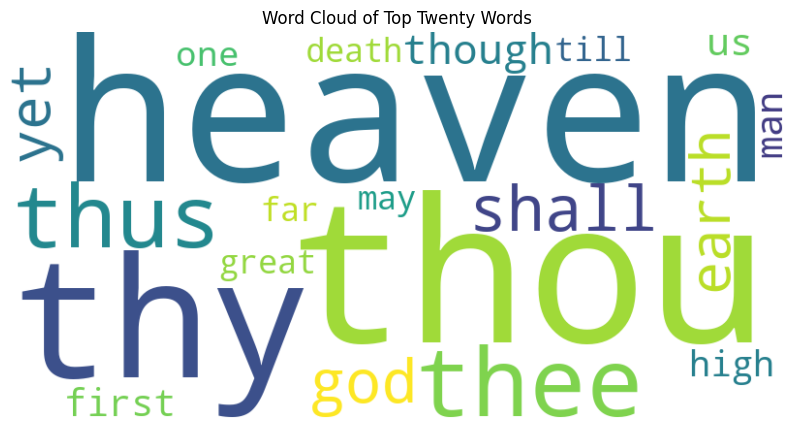

In [15]:
%pip install wordcloud

from wordcloud import WordCloud

word_freq = {word: freq for word, freq in top_twenty}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Twenty Words')
plt.show()
